In [45]:
import pandas as pd
import numpy as np

# Generate synthetic data
def generate_data(num_samples=12000):
    np.random.seed(42)
    data = {
        'connection_duration': np.random.normal(10, 5, num_samples),
        'signal_strength': np.random.normal(-50, 10, num_samples),
        'data_transfer_rate': np.random.normal(5, 2, num_samples),
        'time_of_day': np.random.randint(0, 24, num_samples),
        'intrusion': np.random.randint(0, 2, num_samples)
    }
    return pd.DataFrame(data)

# Save to CSV
df = generate_data()
df.to_csv('../data/bluetooth_data.csv', index=False)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load and preprocess data
df = pd.read_csv('../data/bluetooth_data.csv')
X = df[['connection_duration', 'signal_strength', 'data_transfer_rate', 'time_of_day']]
y = df['intrusion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.34      0.41      1181
           1       0.52      0.69      0.59      1219

    accuracy                           0.52      2400
   macro avg       0.52      0.52      0.50      2400
weighted avg       0.52      0.52      0.50      2400



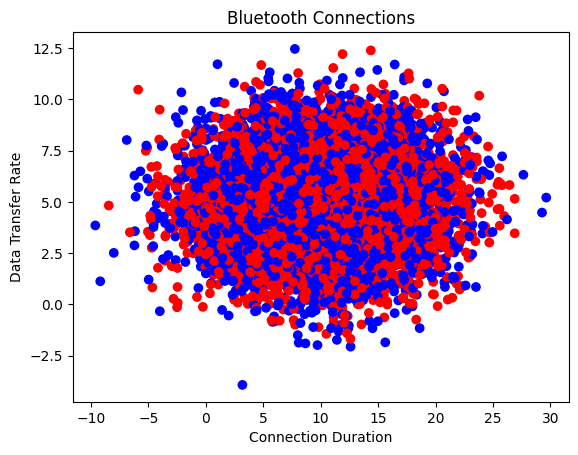

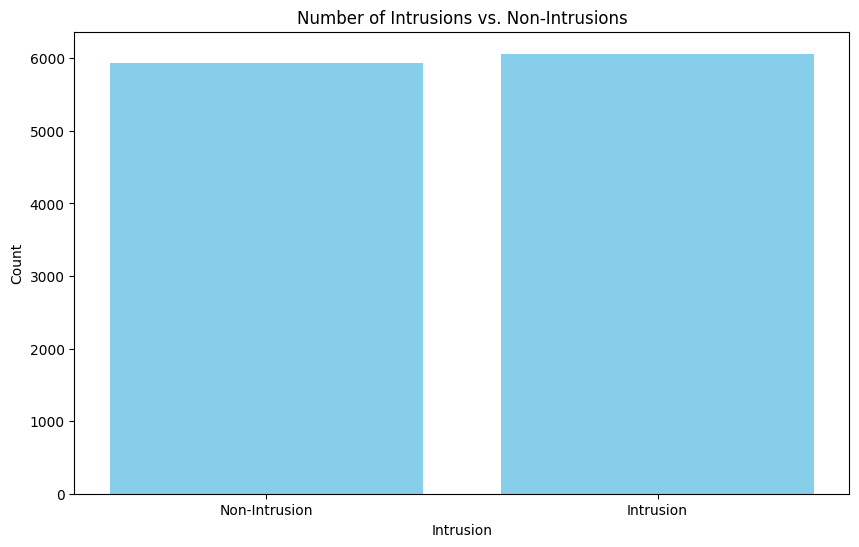

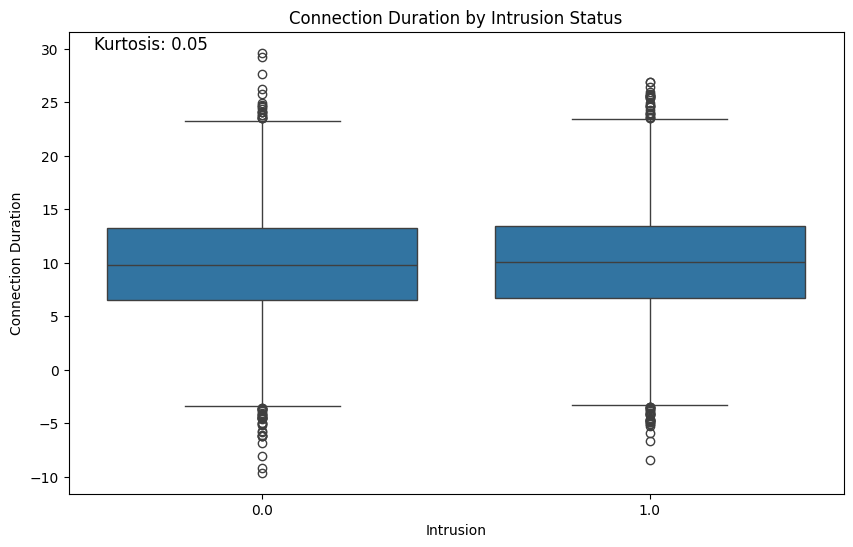

In [47]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

data = np.genfromtxt('../data/bluetooth_data.csv', delimiter=',', skip_header=1)
# Define column names based on the structure of your CSV file
columns = ['connection_duration', 'signal_strength', 'data_transfer_rate', 'time_of_day', 'intrusion']

plt.scatter(data[:, 0], data[:, 2], c=data[:, -1], cmap='bwr')
plt.xlabel('Connection Duration')
plt.ylabel('Data Transfer Rate')
plt.title('Bluetooth Connections')
plt.show()

# Bar Chart for Intrusions
df = pd.DataFrame(data, columns=columns)
plt.figure(figsize=(10, 6))
intrusion_counts = df['intrusion'].value_counts()
plt.bar(intrusion_counts.index, intrusion_counts.values, color='skyblue')
plt.xlabel('Intrusion')
plt.ylabel('Count')
plt.title('Number of Intrusions vs. Non-Intrusions')
plt.xticks([0, 1], ['Non-Intrusion', 'Intrusion'])
plt.show()

# Box Plot with Kurtosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='intrusion', y='connection_duration', data=df)
plt.xlabel('Intrusion')
plt.ylabel('Connection Duration')
plt.title('Connection Duration by Intrusion Status')

# Calculate and display kurtosis
kurtosis = stats.kurtosis(df['connection_duration'])
plt.figtext(0.15, 0.85, f'Kurtosis: {kurtosis:.2f}', ha='left', fontsize=12)
plt.show()

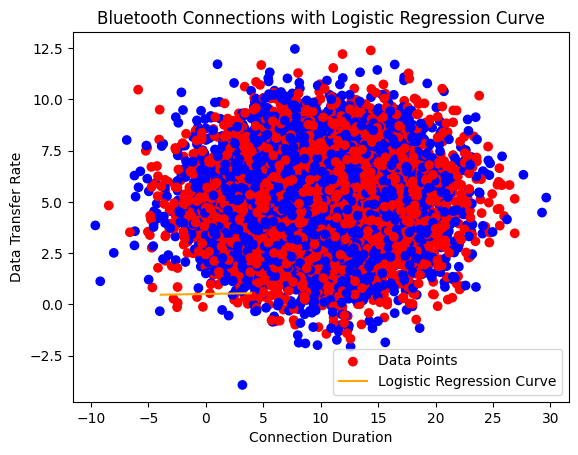

In [48]:
# Define the predictor variable for the logistic regression curve
x_logreg = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)

# Predict probabilities using the trained logistic regression model
# Note: We need to provide all four features (connection_duration, signal_strength, data_transfer_rate, time_of_day)
X_logreg = np.column_stack((x_logreg, np.zeros_like(x_logreg), np.zeros_like(x_logreg), np.zeros_like(x_logreg)))
y_logreg = model.predict_proba(X_logreg)[:, 1]

# Plot the scatter points (existing plot)
plt.scatter(data[:, 0], data[:, 2], c=data[:, -1], cmap='bwr', label='Data Points')

# Plot the logistic regression curve
plt.plot(x_logreg, y_logreg, color='orange', label='Logistic Regression Curve')

plt.xlabel('Connection Duration')
plt.ylabel('Data Transfer Rate')
plt.title('Bluetooth Connections with Logistic Regression Curve')
plt.legend()
plt.show()
